# Actor Critic
## Table of Contents
[<h3>1. Introduction</h3>](#1.)
[<h3>2. Baseline functions</h3>](#2.)
[<h3>3. Advantage Actor-Critic (A2C) Algorithm</h3>](#3.)
&emsp; [3.1. Actor-critic loss](#3.1.) 
[<h3>4. Pseudo-code of A2C-Monte Carlo Algorithm</h3>](#4.)
&emsp; [4.1. Testing the algorithm on the Lunar Lander environment](#4.1.) 
[<h3>5. Pseudo-code of A2C-Temporal Difference Algorithm</h3>](#5.)
&emsp; [5.1. Testing the algorithm on the Lunar Lander environment](#5.1.) 
[<h3>6. Pseudo-code of Q Actor Critic Algorithm</h3>](#6.)
&emsp; [6.1. Testing the algorithm on the Lunar Lander environment](#6.1.) 
[<h3>7. Conslusion</h3>](#7.)

<a id='1.'></a>
## 1. Introduction
With the usual policy gradient algorithm (REINFORCE), the policy parameters are optimized using Monte Carlo methods (ie samples are chosen randomly). Therefore, there is a large change in the logarithmic probability and the cumulative future reward because each time, during training, can be very different from the previous ones. <br />

For this reason, gradient noises are created, which leads to unstable learning. <br /> <br />

Presentation of the connection between actor-critic methods and policy-based and off-policy methods:
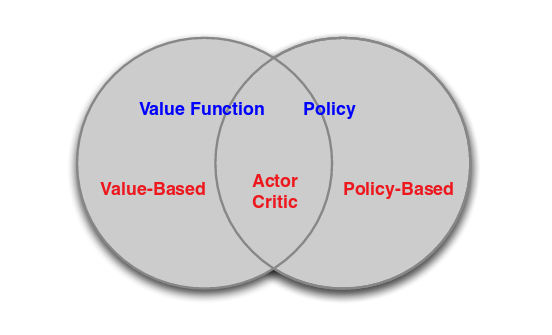

<a id='2.'></a>
## 2. Baseline functions
One way to suppress gradient noise is to use a "baseline" function. In the following, the formulas of the Actor Critic algorithms will be presented.
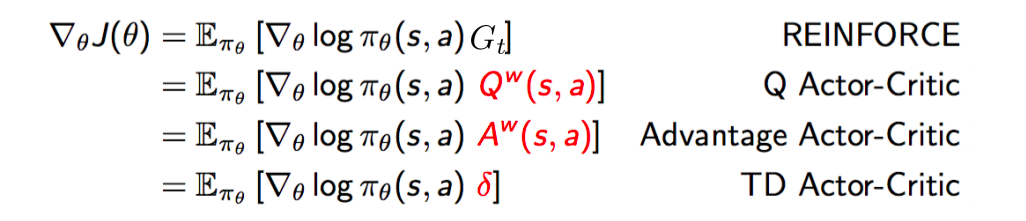

<a id='3.'></a>
## 3. Advantage Actor-Critic (A2C) Algorithm

When calculating the gradient of the objective function, instead of the accumulated future reward ($G_{t}$), the advantage is calculated using the formula $G(s_{t}, a_{t}) - V_{\theta}^{\pi}(s_{t})$ where the state value $V_{\theta}^{\pi}(s_{t})$ is obtained using a neural network. <br /> <br />

Advantage shows how much better it is to perform a specific action for a given state compared to a randomly selected action using policy $\pi$ for the current state, assuming that policy $\pi$ will be followed afterwards. <br /> <br />

During the implementation of the project, one neural network was created that has two different outputs (policy and state value). <br /> <br />
The network implementation is in [ac_net.py](a2c/advantage_mc/a2c_model.py)

<a id='3.1.'></a>
### 3.1. Actor-critic loss
Since the same neural network has two different outputs, the objective function is a combination of the "actor loss" and "critic loss" objective functions:
$$L = L_{actor} + L_{critic}$$
#### Actor Loss
"Actor Loss" is calculated using the "advantage actor-critic" algorithm: <br />
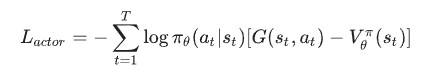

**The minus sign is added because it is necessary to maximize the expected value.**

#### Critic Loss
The goal is to approximate the value of the neural network $𝑉$ to the accumulated future rewards $𝐺$ , which is why this is a regression problem with an objective function:
$$L_{critic} = L_{\delta}(G, V_{\theta}^{\pi})$$
where $𝐿_{\delta}$ is the [Huber loss](https://en.wikipedia.org/wiki/Huber_loss), which is less sensitive to noise than the least squares method.

<a id='4.'></a>
## 4. Pseudo-code of A2C-Monte Carlo Algorithm
The implementation of the algorithm is in the [advantage_mc/ac_agent.py](a2c/advantage_mc/a2c_agent.py) file. <br />

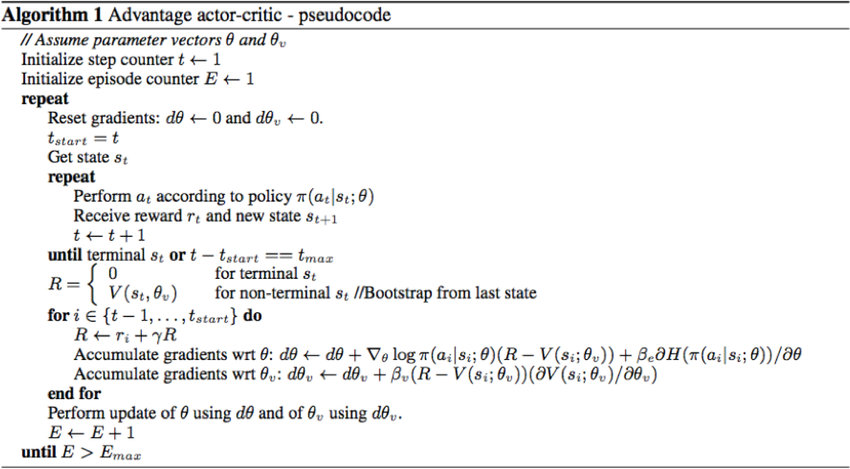

<a id='4.1.'></a>
### 4.1. Testing the algorithm on the Lunar Lander environment
To implement the algorithm, the ***TensorFlow-2*** library with ***Graph Mode*** was used to significantly speed up code execution.

In [1]:
import gym
import warnings
warnings.filterwarnings('ignore')

from a2c.advantage_mc.a2c_agent import ActorCriticAgent

The *hyperparameter values* on which the final agent was trained are as follows:

In [2]:
GAMMA = 0.99
LEARNING_RATE = 1e-2
NUM_HIDDEN_UNITS = 256

# For agent testing
ACTION = "TEST"

Agent's training and reward plot display across episodes:

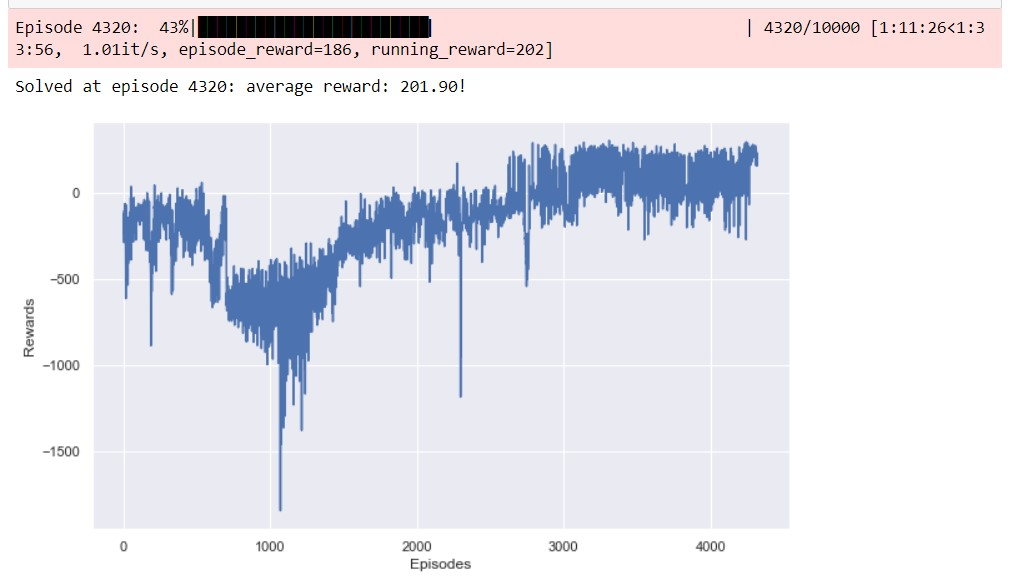

In [3]:
# Initialization of environment
env = gym.make("LunarLander-v2")

a2c_mc_agent = ActorCriticAgent(env, GAMMA, LEARNING_RATE, NUM_HIDDEN_UNITS)

if ACTION == "TRAIN":
    a2c_mc_agent.train_agent()
else:
    a2c_mc_agent.load_weights('weights/a2c_mc_model_weights/')

One episode of trained agent:

In [4]:
a2c_mc_agent.test_agent(display_episode=True)

Episode reward: 207.04!


<a id='5.'></a>
## 5. Pseudo-code of A2C-Temporal Difference Algorithm
The implementation of the algorithm is in the [advantage_td/ac_agent.py](a2c/advantage_td/a2c_agent.py) file.

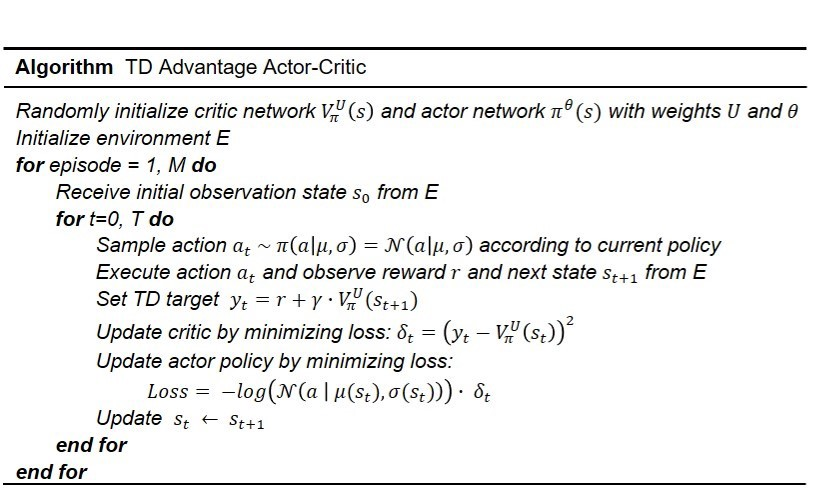

<a id='5.1.'></a>
### 5.1. Testing the algorithm on the Lunar Lander environment
To implement the algorithm, the ***TensorFlow-2*** library with ***Graph Mode*** was used to significantly speed up code execution.

In [5]:
import gym
import warnings
warnings.filterwarnings('ignore')

from a2c.advantage_td.a2c_agent import ActorCriticAgent

The *hyperparameter values* on which the final agent was trained are as follows:

In [7]:
GAMMA = 0.99
LEARNING_RATE = 1e-3
NUM_HIDDEN_UNITS = 128

# For agent testing
ACTION = "TEST"

Agent's training and reward plot display across episodes:

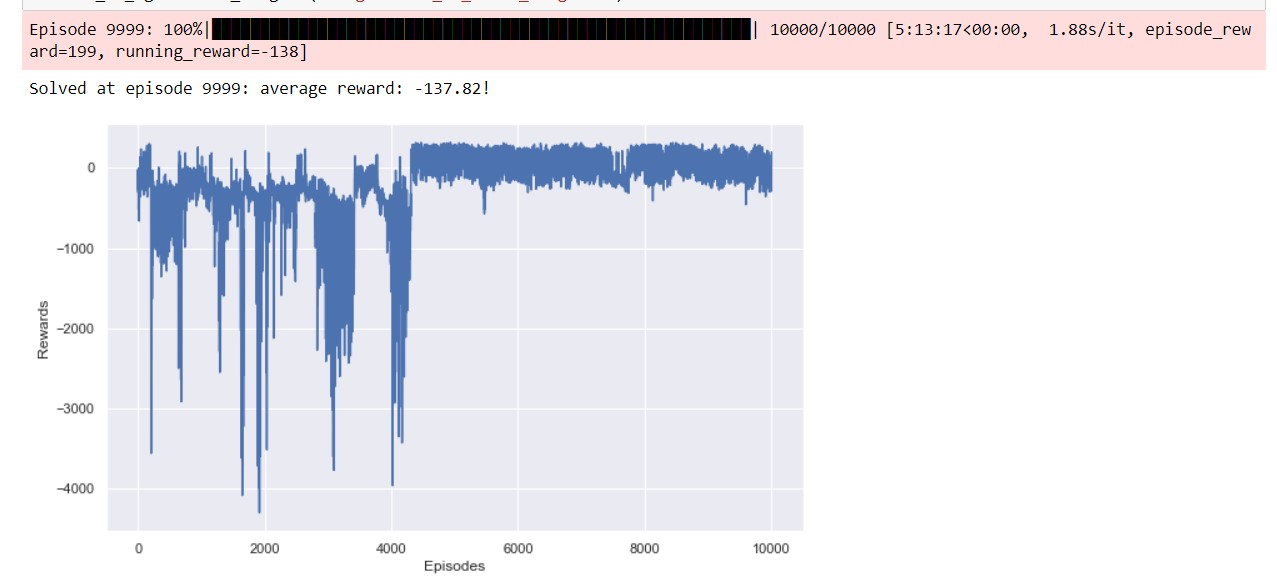

In [8]:
# Initialization of environment
env = gym.make("LunarLander-v2")

a2c_td_agent = ActorCriticAgent(env, GAMMA, LEARNING_RATE, NUM_HIDDEN_UNITS)

if ACTION == "TRAIN":
    a2c_td_agent.train_agent()
else:
    a2c_td_agent.load_weights('weights/a2c_td_model_weights/')

One episode of trained agent:

In [9]:
a2c_td_agent.test_agent(display_episode=True)

Episode reward: -44.16!


<a id='6.'></a>
## 6. Pseudo-code of Q Actor Critic Algorithm
The implementation of the algorithm is in the [q_ac_agent.py](q_actor_critic/q_ac_agent.py) file. <br />
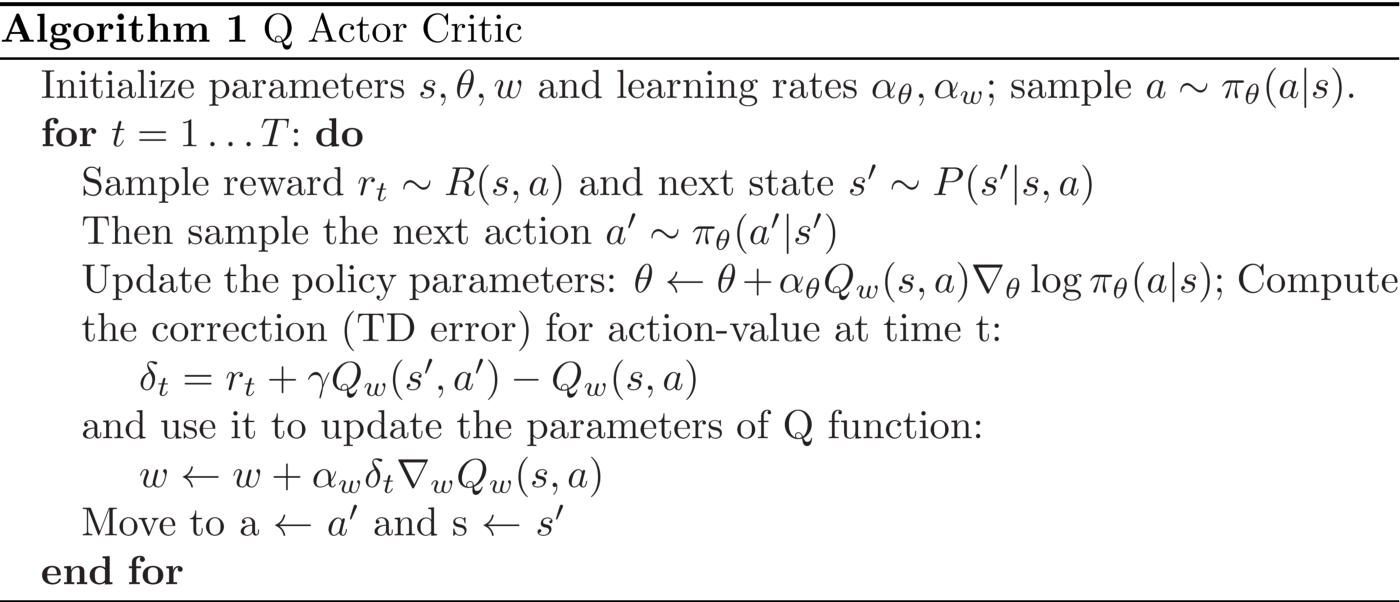

<a id='6.1.'></a>
### 6.1. Testing the algorithm on the Lunar Lander environment
To implement the algorithm, the ***TensorFlow-2*** library with ***Graph Mode*** was used to significantly speed up code execution.

In [1]:
import gym
import warnings
warnings.filterwarnings('ignore')

from q_actor_critic.q_ac_agent import ActorCriticAgent

The *hyperparameter values* on which the final agent was trained are as follows:

In [2]:
GAMMA = 0.99
LEARNING_RATE = 1e-2
NUM_HIDDEN_UNITS = 128

# For agent testing
ACTION = "TEST"

Agent's training and reward plot display across episodes:

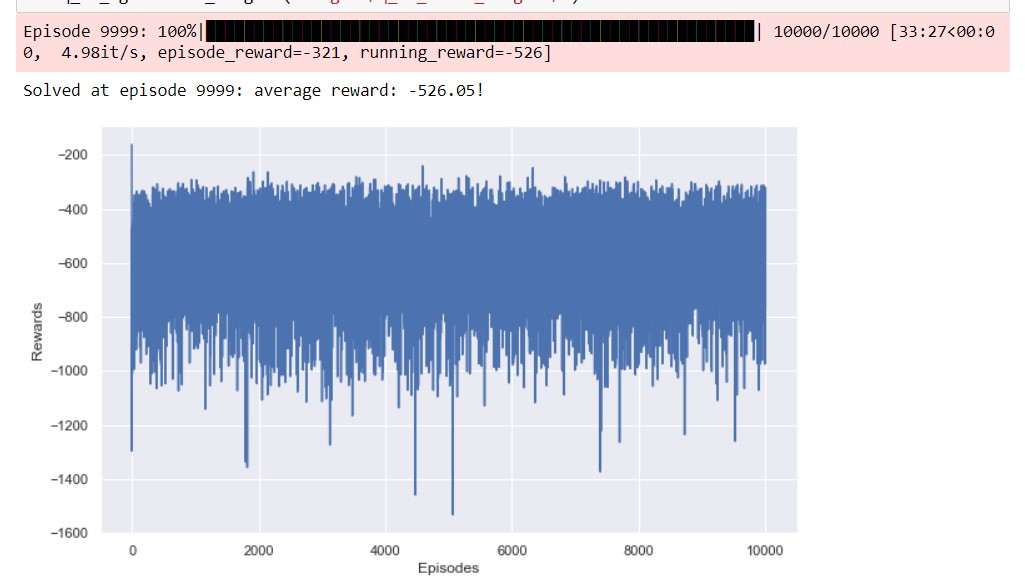

In [3]:
# Initialization of environment
env = gym.make("LunarLander-v2")

q_ac_agent = ActorCriticAgent(env, GAMMA, LEARNING_RATE, NUM_HIDDEN_UNITS)

if ACTION == "TRAIN":
    q_ac_agent.train_agent()
else:
    q_ac_agent.load_weights('weights/q_ac_model_weights/')

One episode of trained agent:

In [4]:
q_ac_agent.test_agent(display_episode=True)

Episode reward: -608.15!


<a id='7.'></a>
## 7. Conclusion
The A2C Monte Carlo algorithm successfully beat the environment while the other algorithms did not. At A2C Temporal Difference, it is observed that it probably fell into a local minimum (maximum). <br /> <br />
Algorithm performance can be increased by tuning hyperparameters.